In [2]:
import numpy as np # linear algebra
import pandas as pd 

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns

import csv

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/star-dataset/6 class csv.csv


In [3]:
star_filepath = '../input/star-dataset/6 class csv.csv'
star_data = pd.read_csv(star_filepath)
star_data.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


In [4]:
star_data.info()
star_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
 5   Star color              240 non-null    object 
 6   Spectral Class          240 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type
count,240.000000,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396,2.500000
std,9552.425037,179432.244940,517.155763,10.532512,1.711394
min,1939.000000,0.000080,0.008400,-11.920000,0.000000
25%,3344.250000,0.000865,0.102750,-6.232500,1.000000
50%,5776.000000,0.070500,0.762500,8.313000,2.500000
75%,15055.500000,198050.000000,42.750000,13.697500,4.000000
max,40000.000000,849420.000000,1948.500000,20.060000,5.000000


In [5]:
star_data.isna().sum()

Temperature (K)           0
Luminosity(L/Lo)          0
Radius(R/Ro)              0
Absolute magnitude(Mv)    0
Star type                 0
Star color                0
Spectral Class            0
dtype: int64

In [6]:
# Make color titles more consistent

star_data_modified = star_data.copy()
format_colors = {
    'white': 'White',
    'yellow-white': 'Yellow White',
    'White-Yellow': 'Yellow White',
    'yellowish': 'Yellowish',
    'Blue ': 'Blue',
    'Blue white': 'Blue White',
    'Blue-white': 'Blue White',
    'Blue white ': 'Blue White',
    'Blue-White': 'Blue White',
}
star_data_modified['Star color'] = star_data['Star color'].replace(format_colors)

# ***Visual Analysis***

# 1. Temperature and Luminosity against Star Type

Text(0, 0.5, 'Star type')

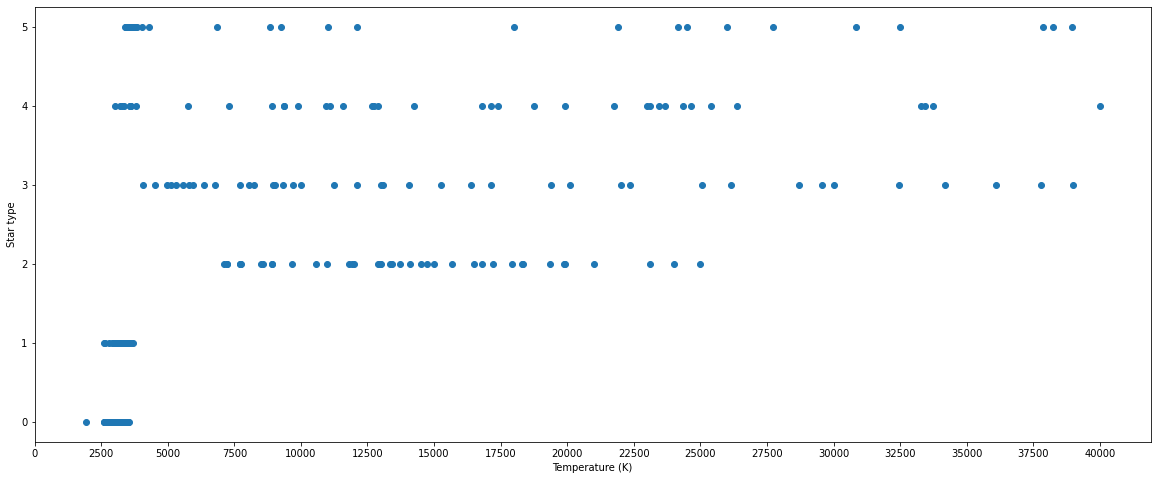

In [7]:
plt.figure(figsize=(20, 8))
plt.scatter(x=star_data['Temperature (K)'], y=star_data['Star type'])
plt.xticks(np.arange(0, 42500, 2500))
plt.xlabel('Temperature (K)')
plt.ylabel('Star type')

In [8]:
temp_ranges = star_data.groupby('Star type')['Temperature (K)'].agg(['min','max'])

print(temp_ranges)

            min    max
Star type             
0          1939   3531
1          2621   3692
2          7100  25000
3          4077  39000
4          3008  40000
5          3399  38940


y-axis: Star type in ascending order (0-5): Brown dwarf, Red dwarf, White dwarf, Main sequence, Supergiant, Hypergiant)

According to the dataset, there is little variety in temperature for brown and red dwarfs, but the opposite is true for white dwarfs up to hypergiants.

Text(0, 0.5, 'Star type')

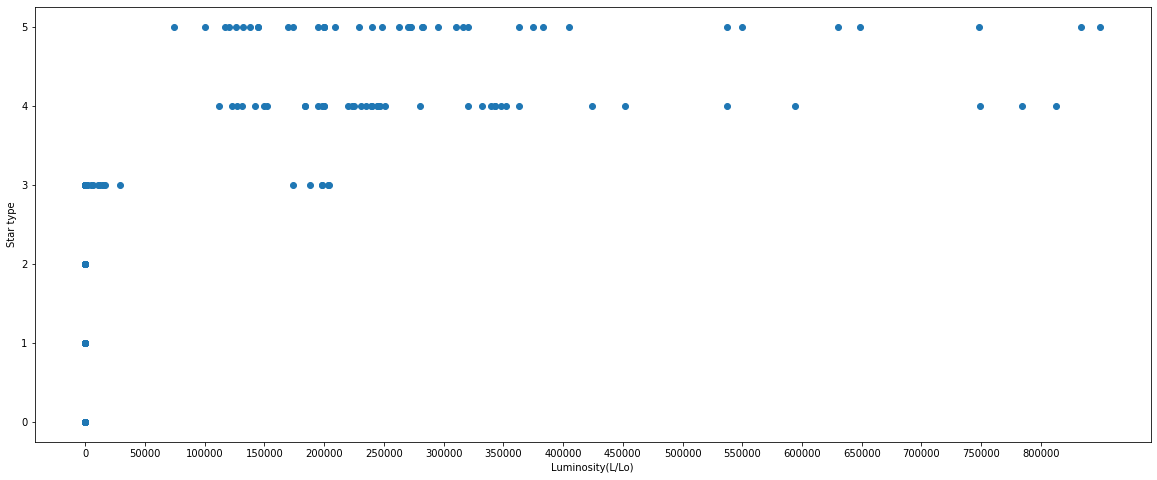

In [9]:
plt.figure(figsize=(20, 8))
plt.scatter(x=star_data['Luminosity(L/Lo)'], y=star_data['Star type'])
plt.xticks(np.arange(0, 850000, 50000))
plt.xlabel('Luminosity(L/Lo)')
plt.ylabel('Star type')

# 2. Correlations between Temperature and other quantitative variables

In [16]:
corr_matrix = star_data.corr()
corr_matrix['Temperature (K)'].sort_values(ascending=False)

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type
Luminosity(L/Lo),0.393404,1.000000,0.526516,-0.692619,0.676845
Radius(R/Ro),0.064216,0.526516,1.000000,-0.608728,0.660975
Absolute magnitude(Mv),-0.420261,-0.692619,-0.608728,1.000000,-0.955276
Star type,0.411129,0.676845,0.660975,-0.955276,1.000000


- Luminosity: 0.393404
- Radius: 0.064216
- Absolute magnitude: -0.420261

The other variables generally have weak-moderate correlation to temperature. Luminosity has the higehst.

# 3. Most common spectral class type

In [ ]:
star_data['Spectral Class'].value_counts()

Result: the most common star is of spectral class 'M', or rather a star with little to no hydrogen and a temperature below 3800K.

# 4. Hertzsprung-Russell (HR) diagram

In [ ]:
from matplotlib.ticker import ScalarFormatter

# Match spectral classes to scaled colors (pulled off from online)
class_colors = {
    'O': '#5f4ad5',
    'B': '#b7c3f7',
    'A': '#ededed',
    'F': '#f3f2c6',
    'G': '#e9e8a5',
    'K': '#f35d29',
    'M': '#f5334b'
}
star_data_modified['Spectral Class'] = star_data['Spectral Class'].replace(class_colors)

w, h = 1100, 1300
fig, axs = plt.subplots(figsize=(w/100, h/100))

# Create plot of temperature against luminosity, scaled by spectral class coloring

axs.scatter(star_data['Temperature (K)'], star_data['Luminosity(L/Lo)'], s=10, c=star_data_modified['Spectral Class'])
axs.set_yscale('log')
axs.set_xscale('log')
axs.set_ylim(1.e-5, 1500000)
axs.set_xlim(40000, 1000)
axs.set_xticks([40000, 10000, 5000, 2500, 1500])
axs.get_xaxis().set_major_formatter(ScalarFormatter())
axs.set_xlabel('Temperature (K)')
axs.set_ylabel('Luminosity (L/Lo)')
axs.set_facecolor('black')

#label both x-axes
axs_twin = axs.twiny()
axs_twin.set_xlabel('Spectral Class')
axs_twin.xaxis.labelpad = 10
axs_twin.xaxis.set_label_position('top')

# replace top axis ticks with class names
desired_order = ["O","B","A","F","G","K","M"]
star_data['Spectral Class'] = star_data['Spectral Class'].astype("category")
star_data['Spectral Class'].cat.set_categories(desired_order, inplace=True)
star_data.sort_values('Spectral Class', inplace=True)
axs_twin.xaxis.set_ticklabels(star_data['Spectral Class'].cat.categories)
axs_twin.set_xticks(np.linspace(0, len(star_data['Spectral Class'].cat.categories)-1, num=7))

plt.show()

If I could do more with this project, I would figure out how to make the Hertzsprung-Russell diagram interactive and more detailed.

# References
- https://www.kaggle.com/learn/data-visualization?rvi=1
- https://matplotlib.org/stable/tutorials/colors/colors.html
- https://imagecolorpicker.com/en